<a href="https://colab.research.google.com/github/idenw/Deep-Learning/blob/master/Keras_Classification_actual_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


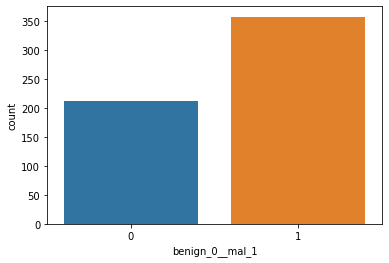

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

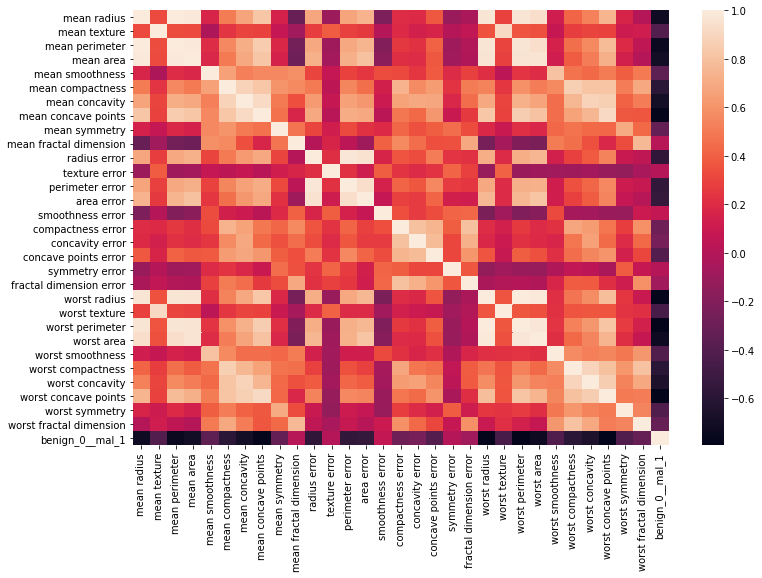

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

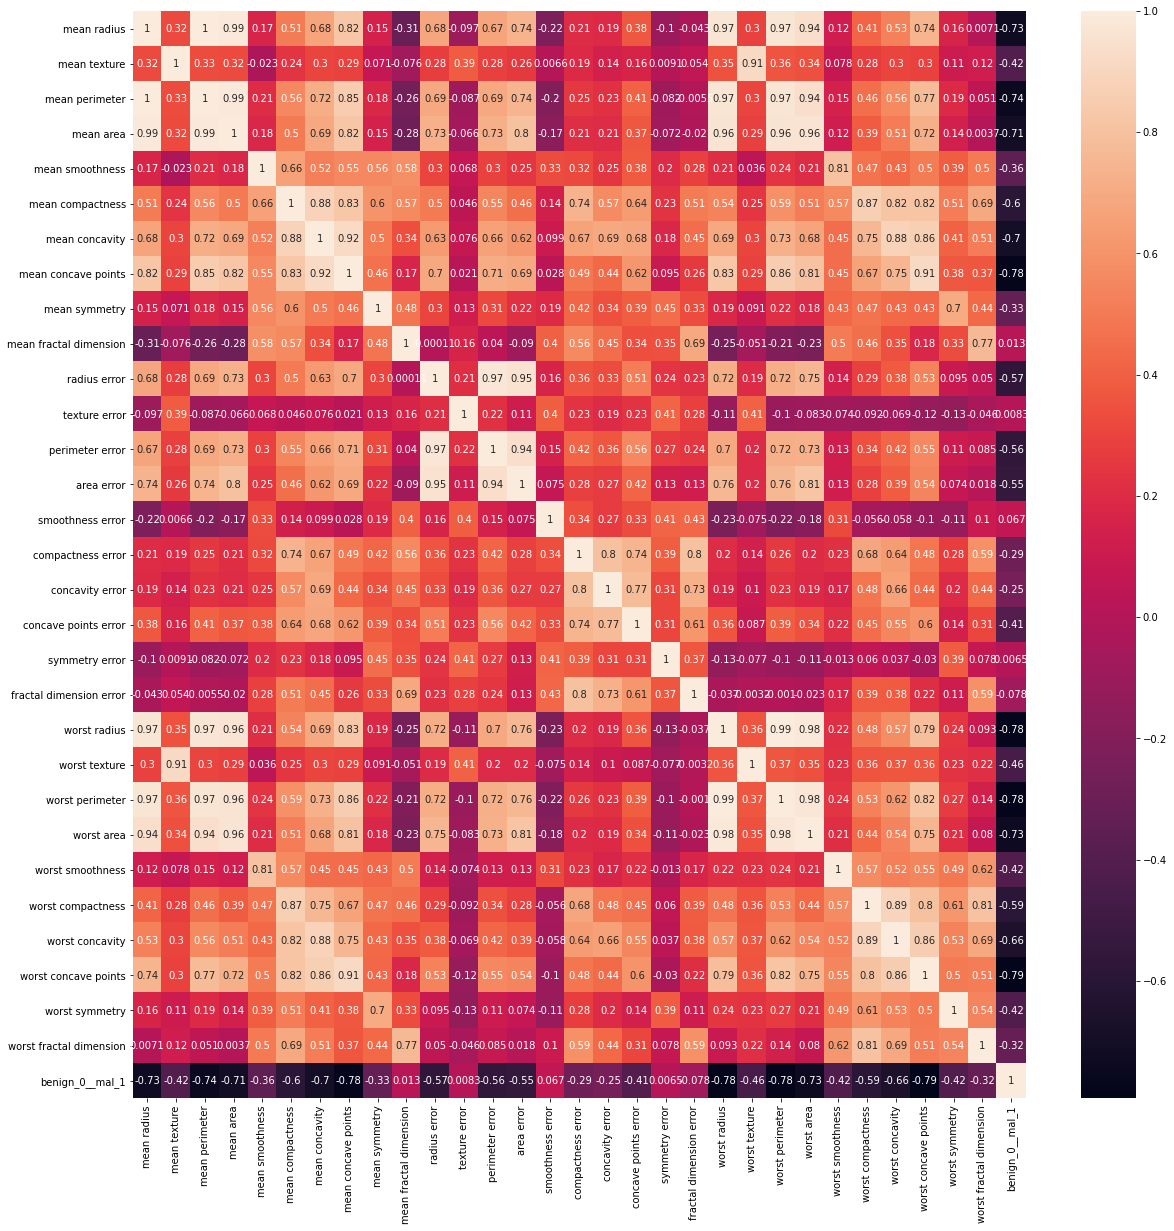

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [ ]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [ ]:
df=df.drop(drop_list, axis=1)

In [ ]:
df.shape

(569, 25)

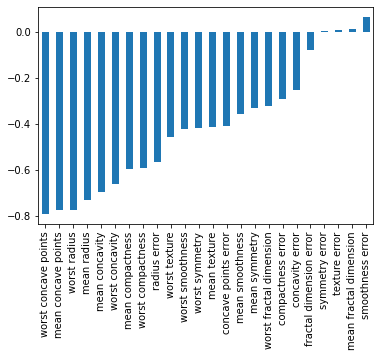

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot.bar()

Train Test Split

In [ ]:
X=df.drop('benign_0__mal_1', axis=1).values

In [ ]:
y=df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25,random_state=42)

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Creating the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
X_train.shape

(426, 24)

In [ ]:
y_train.shape

(426,)

In [ ]:
model = Sequential()
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.6670 - accuracy: 0.7862 - val_loss: 0.6474 - val_accuracy: 0.9161
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.8780 - val_loss: 0.6263 - val_accuracy: 0.9301
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.9060 - val_loss: 0.5984 - val_accuracy: 0.9441
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.9011 - val_loss: 0.5549 - val_accuracy: 0.9301
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5445 - accuracy: 0.9014 - val_loss: 0.5099 - val_accuracy: 0.8881
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.9128 - val_loss: 0.4622 - val_accuracy: 0.9231
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.9085 - val_loss: 0.4173 - val_accuracy: 0.9371
Epoch 8/600


In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.663949,0.807512,0.647434,0.916084
1,0.642296,0.887324,0.626334,0.930070
2,0.617642,0.894366,0.598390,0.944056
3,0.580590,0.910798,0.554899,0.930070
4,0.535459,0.889671,0.509917,0.888112


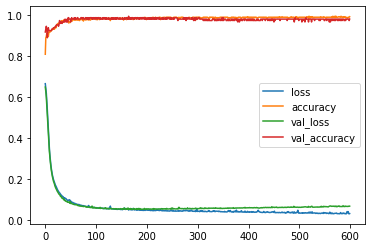

In [ ]:
model_loss.plot()

Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 15)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7151 - accuracy: 0.3569 - val_loss: 0.6948 - val_accuracy: 0.3986
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.4923 - val_loss: 0.6752 - val_accuracy: 0.7483
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.7796 - val_loss: 0.6589 - val_accuracy: 0.8741
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.8388 - val_loss: 0.6399 - val_accuracy: 0.8811
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6299 - accuracy: 0.8747 - val_loss: 0.6159 - val_accuracy: 0.8951
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.9052 - val_loss: 0.5884 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.8961 - val_loss: 0.5544 - val_accuracy: 0.9161
Epoch 8/600


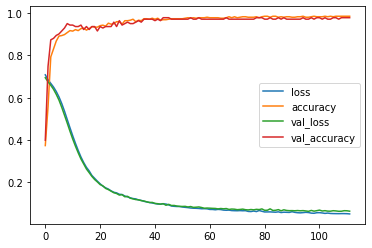

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Dropout Layers

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(24, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7297 - accuracy: 0.4598 - val_loss: 0.6765 - val_accuracy: 0.6434
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7185 - accuracy: 0.4913 - val_loss: 0.6550 - val_accuracy: 0.8322
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.5842 - val_loss: 0.6367 - val_accuracy: 0.8462
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.6231 - val_loss: 0.6205 - val_accuracy: 0.8671
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6344 - accuracy: 0.6740 - val_loss: 0.6009 - val_accuracy: 0.8601
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.6829 - val_loss: 0.5813 - val_accuracy: 0.8951
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6127 - accuracy: 0.6439 - val_loss: 0.5610 - val_accuracy: 0.8811
Epoch 8/600


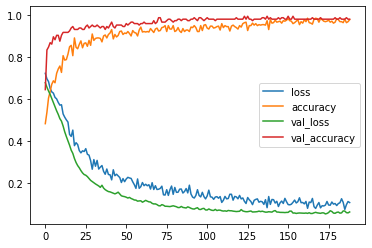

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Model Evaluation

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
print(confusion_matrix(y_test, predictions))

[[52  1]
 [ 2 88]]


Making Predictions

In [ ]:
df.head(2)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [ ]:
df.shape

(569, 25)

In [ ]:
new_data = df.iloc[0][:-1]

In [ ]:
new_data.shape

(24,)

In [ ]:
new_data.ndim

1

In [ ]:
X_train.ndim

2

In [ ]:
X_train.shape

(426, 24)

In [ ]:
a = new_data.values.reshape(1,24)

In [ ]:
a.shape

(1, 24)

In [ ]:
b = new_data.values.reshape(-1,24)

In [ ]:
b.shape

(1, 24)

In [ ]:
new_data = scaler.transform(new_data.values.reshape(-1,24))

In [ ]:
model.predict_classes(new_data)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)